In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

from simu_eulerd import simulate_eulerd

sys.path.append('../code')

In [3]:
#k_eddy, mu, attenu, k0, gamma
params = [0.0001, 0.002, 4, .8, 2]

In [4]:
sim6 = simulate_eulerd(params)

+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0699539184570312


NameError: name 'sim5' is not defined

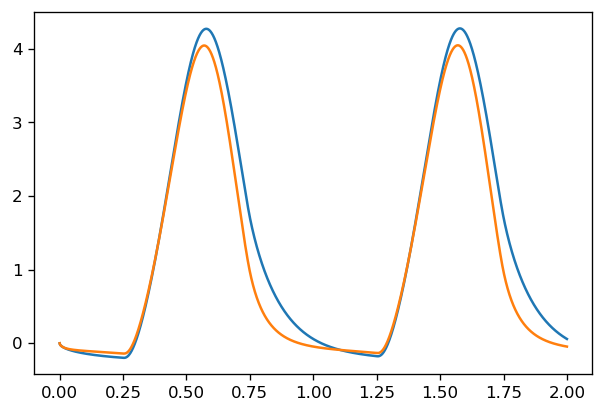

In [5]:
fig, ax = plt.subplots(dpi=120)
ax.plot(sim6[2]/86400,sim6[0][:,0]-sim6[0][:,-1],label='sim6',)
ax.plot(sim6[2]/86400,sim6[0][:,0]-sim6[0][:,20],label='3m')
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,-1],label='sim5',)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,20],label='3m5')
print(sim6[1][20])

ax.legend()
ax.set(title='SST-ftemp')

-3.0452936687931453


[Text(0.5, 1.0, 'SST-ftemp')]

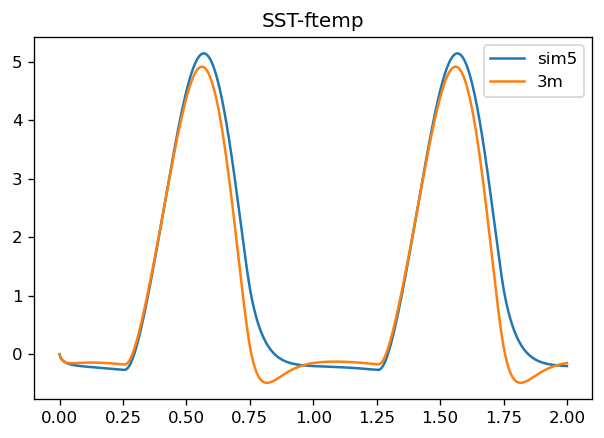

In [52]:
fig, ax = plt.subplots(dpi=120)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,-1],label='sim5',)
ax.plot(sim5[2]/86400,sim5[0][:,0]-sim5[0][:,20],label='3m')
print(sim5[1][20])

ax.legend()
ax.set(title='SST-ftemp')

## Sensitivity tests

In [6]:
pkappa = [1e-5,0.5e-4,1e-4,2e-4,5e-4]
pmu = [0,0.001,0.005,0.01]
pattenu = [1,2,3,4,5,6]
pk0 = [0,0.2,0.4,0.6,0.8,1]
pgamma = [1,2,5,10,20]

In [7]:
simkappa = []
parkappa = params.copy()
for i in range(len(pkappa)):
    parkappa[0] = pkappa[i]
    simkappa.append(simulate_eulerd(parkappa))

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.9826581478118896
+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.9705979824066162
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.179525375366211
+++ Variable time-step interpolation +++
Interpolated dataset has 37083 time steps with average length

-3.0452936687931453


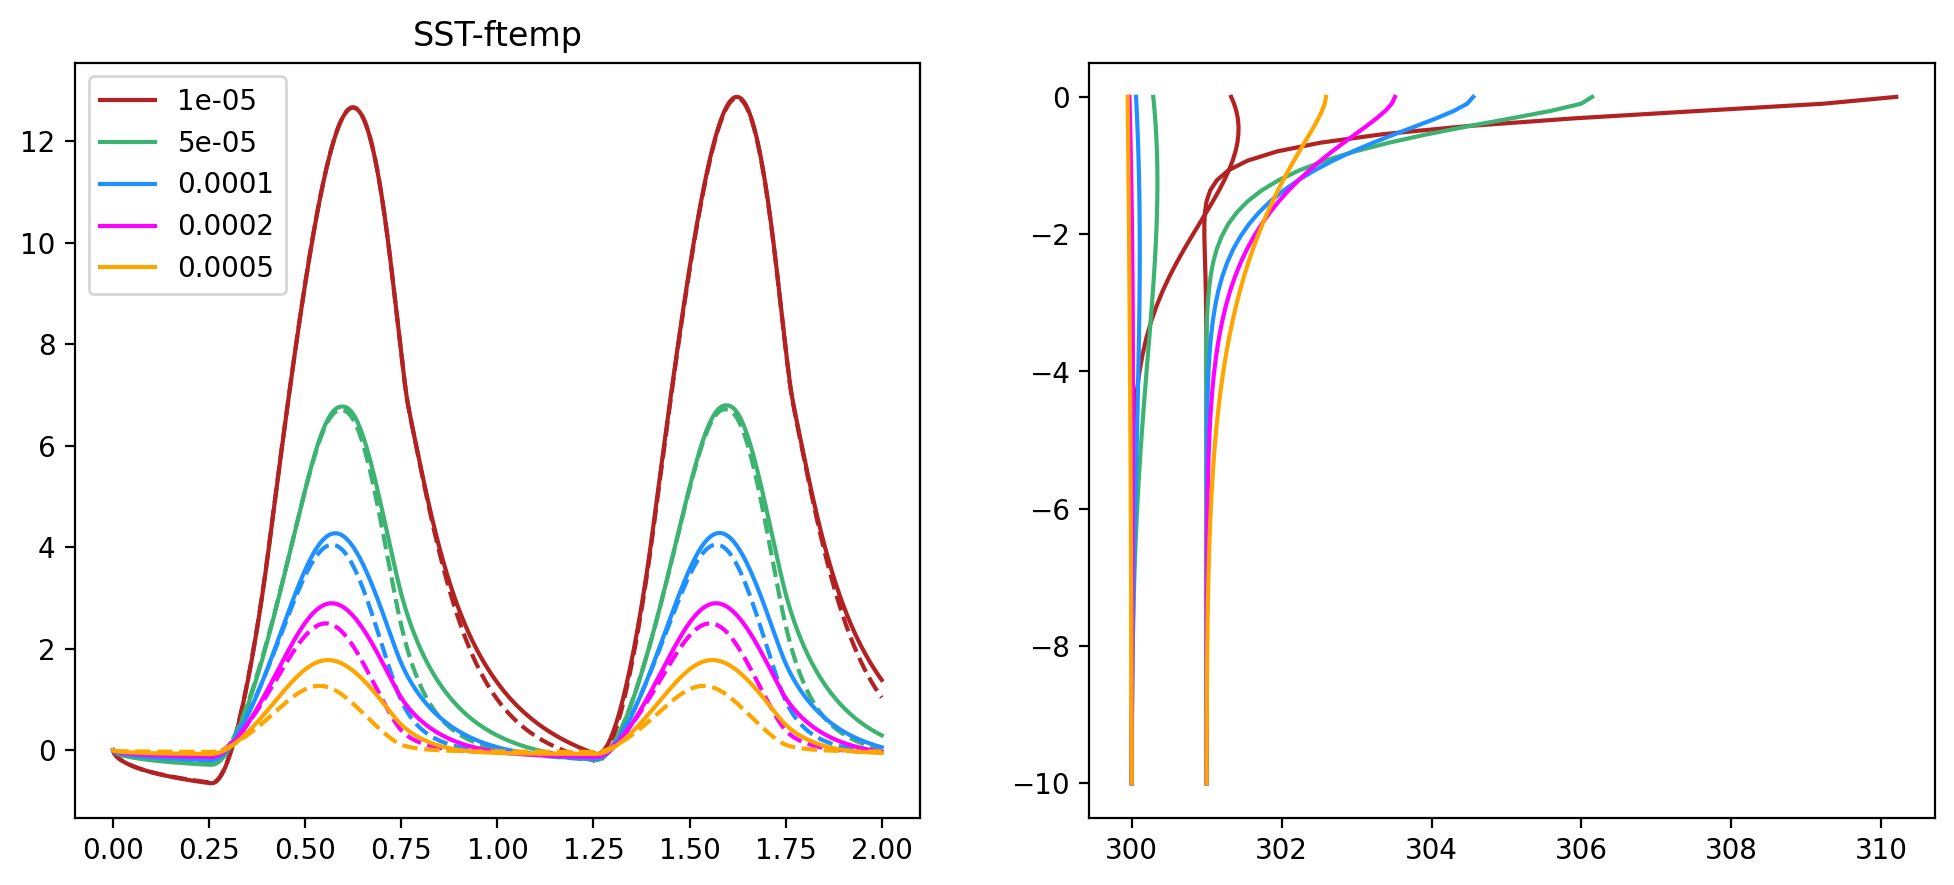

In [9]:
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pkappa)):
    ax[0].plot(simkappa[i][2]/86400,simkappa[i][0][:,0]-simkappa[i][0][:,-1],label=pkappa[i],c=cols[i])
    ax[0].plot(simkappa[i][2]/86400,simkappa[i][0][:,0]-simkappa[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pkappa)):
    noon = np.where(simkappa[i][2]/86400 > 0.5)[0][0]
    night = np.where(simkappa[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simkappa[i][0][noon,:]+1,simkappa[i][1],c=cols[i])
    ax[1].plot(simkappa[i][0][night,:],simkappa[i][1],c=cols[i])

print(sim6[1][20])
plt.show()

In [10]:
simmu = []
parmu = params.copy()
for i in range(len(pmu)):
    parmu[1] = pmu[i]
    simmu.append(simulate_eulerd(parmu))

+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.1246721744537354
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0252282619476318
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.130173921585083
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8

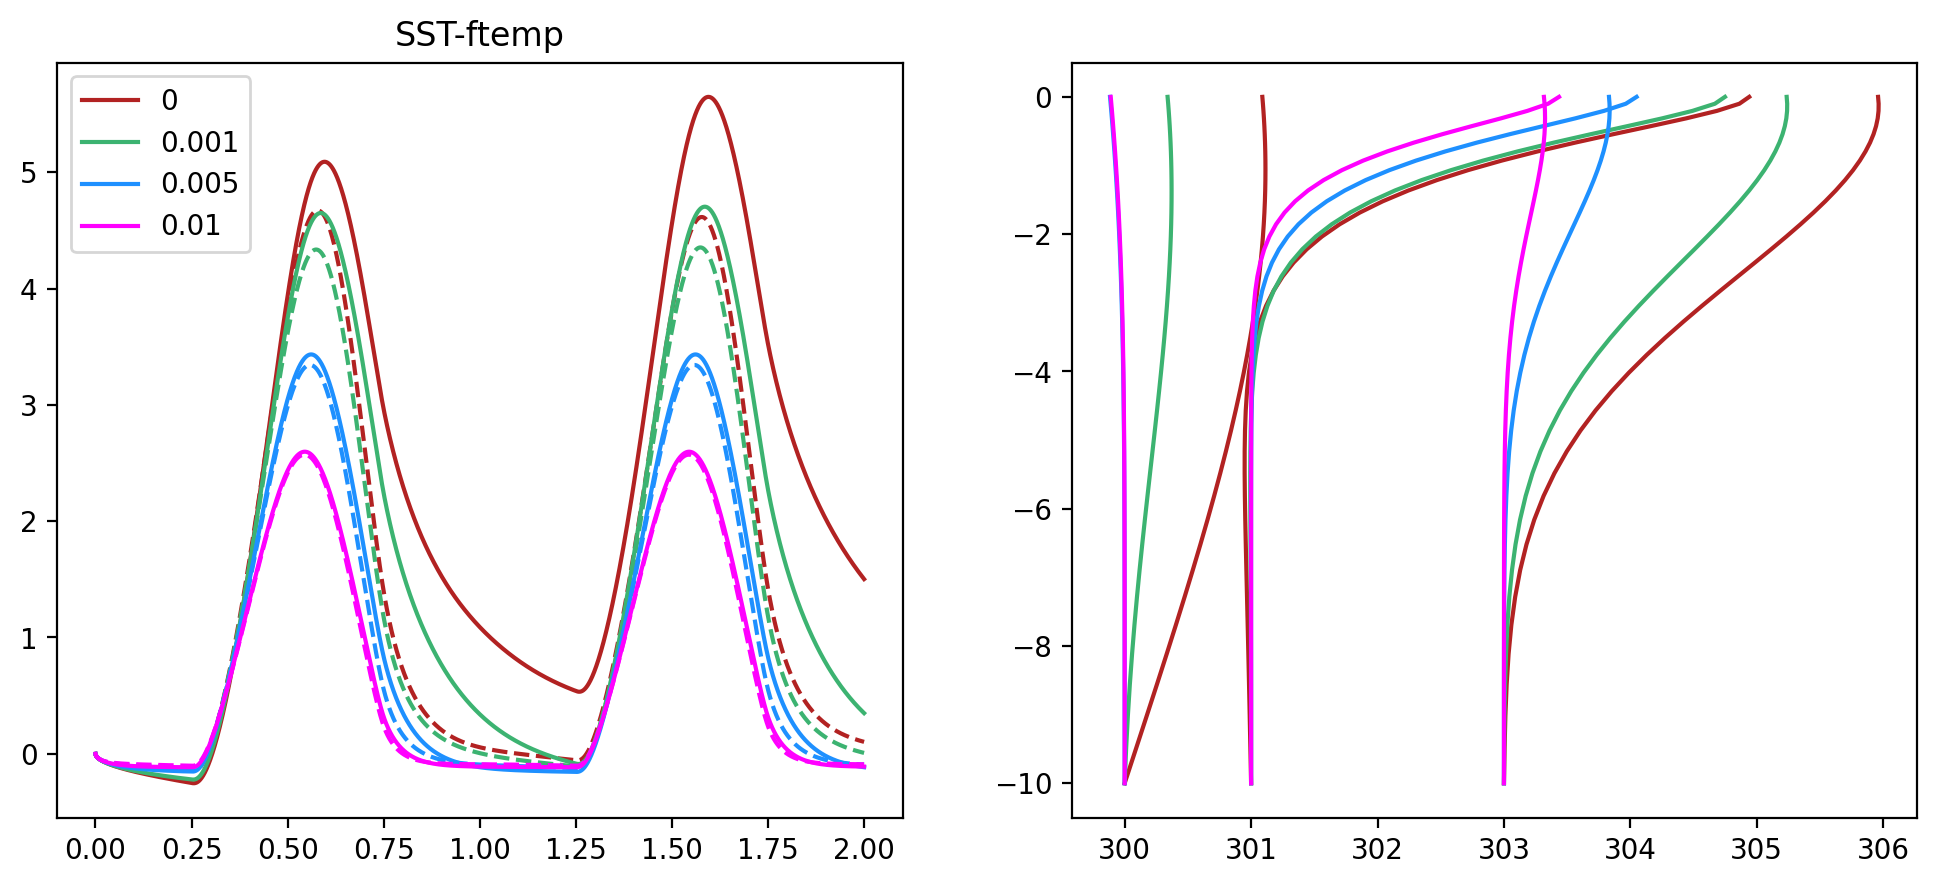

In [11]:
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pmu)):
    ax[0].plot(simmu[i][2]/86400,simmu[i][0][:,0]-simmu[i][0][:,-1],label=pmu[i],c=cols[i])
    ax[0].plot(simmu[i][2]/86400,simmu[i][0][:,0]-simmu[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pmu)):
    noon = np.where(simmu[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simmu[i][2]/86400 > 0.75)[0][0]
    night = np.where(simmu[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simmu[i][0][noon,:]+1,simmu[i][1],c=cols[i])
    ax[1].plot(simmu[i][0][pm6,:]+3,simmu[i][1],c=cols[i])
    ax[1].plot(simmu[i][0][night,:],simmu[i][1],c=cols[i])

plt.show()

+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0256335735321045
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0319721698760986
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.2737007141113281
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 

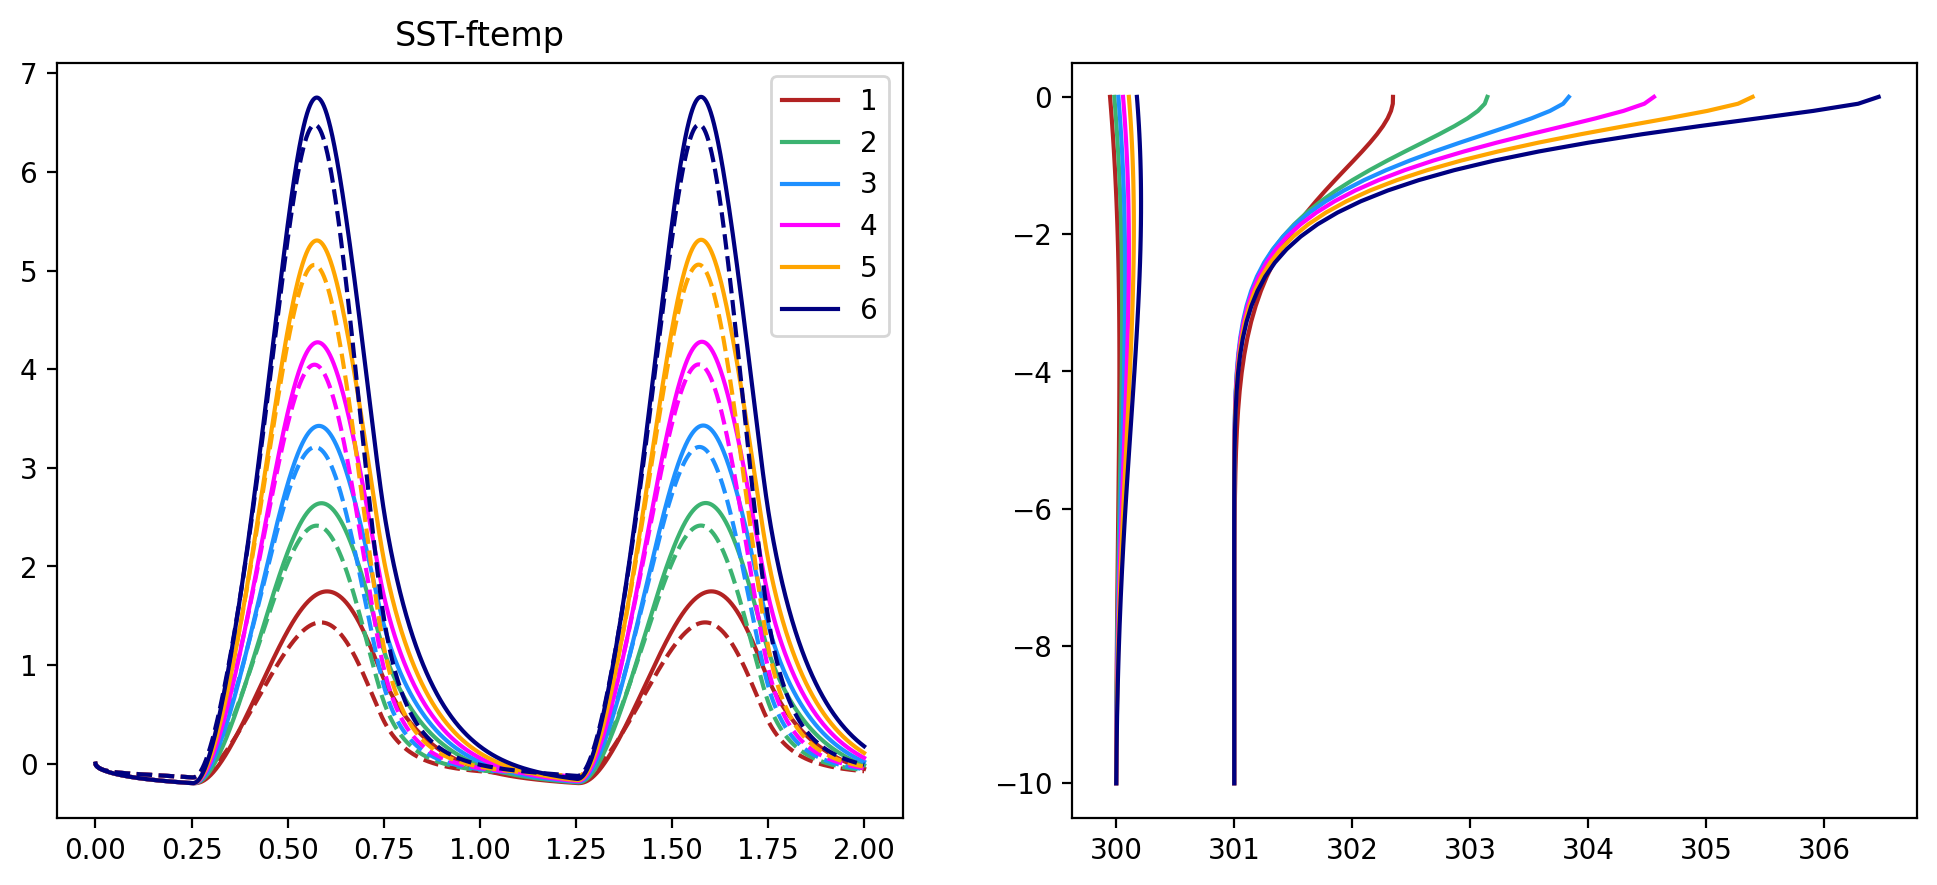

In [12]:
simattenu = []
parattenu = params.copy()
for i in range(len(pattenu)):
    parattenu[2] = pattenu[i]
    simattenu.append(simulate_eulerd(parattenu))
    
cols = ['firebrick','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(pattenu)):
    ax[0].plot(simattenu[i][2]/86400,simattenu[i][0][:,0]-simattenu[i][0][:,-1],label=pattenu[i],c=cols[i])
    ax[0].plot(simattenu[i][2]/86400,simattenu[i][0][:,0]-simattenu[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(pattenu)):
    noon = np.where(simattenu[i][2]/86400 > 0.5)[0][0]
    night = np.where(simattenu[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simattenu[i][0][noon,:]+1,simattenu[i][1],c=cols[i])
    ax[1].plot(simattenu[i][0][night,:],simattenu[i][1],c=cols[i])

plt.show()

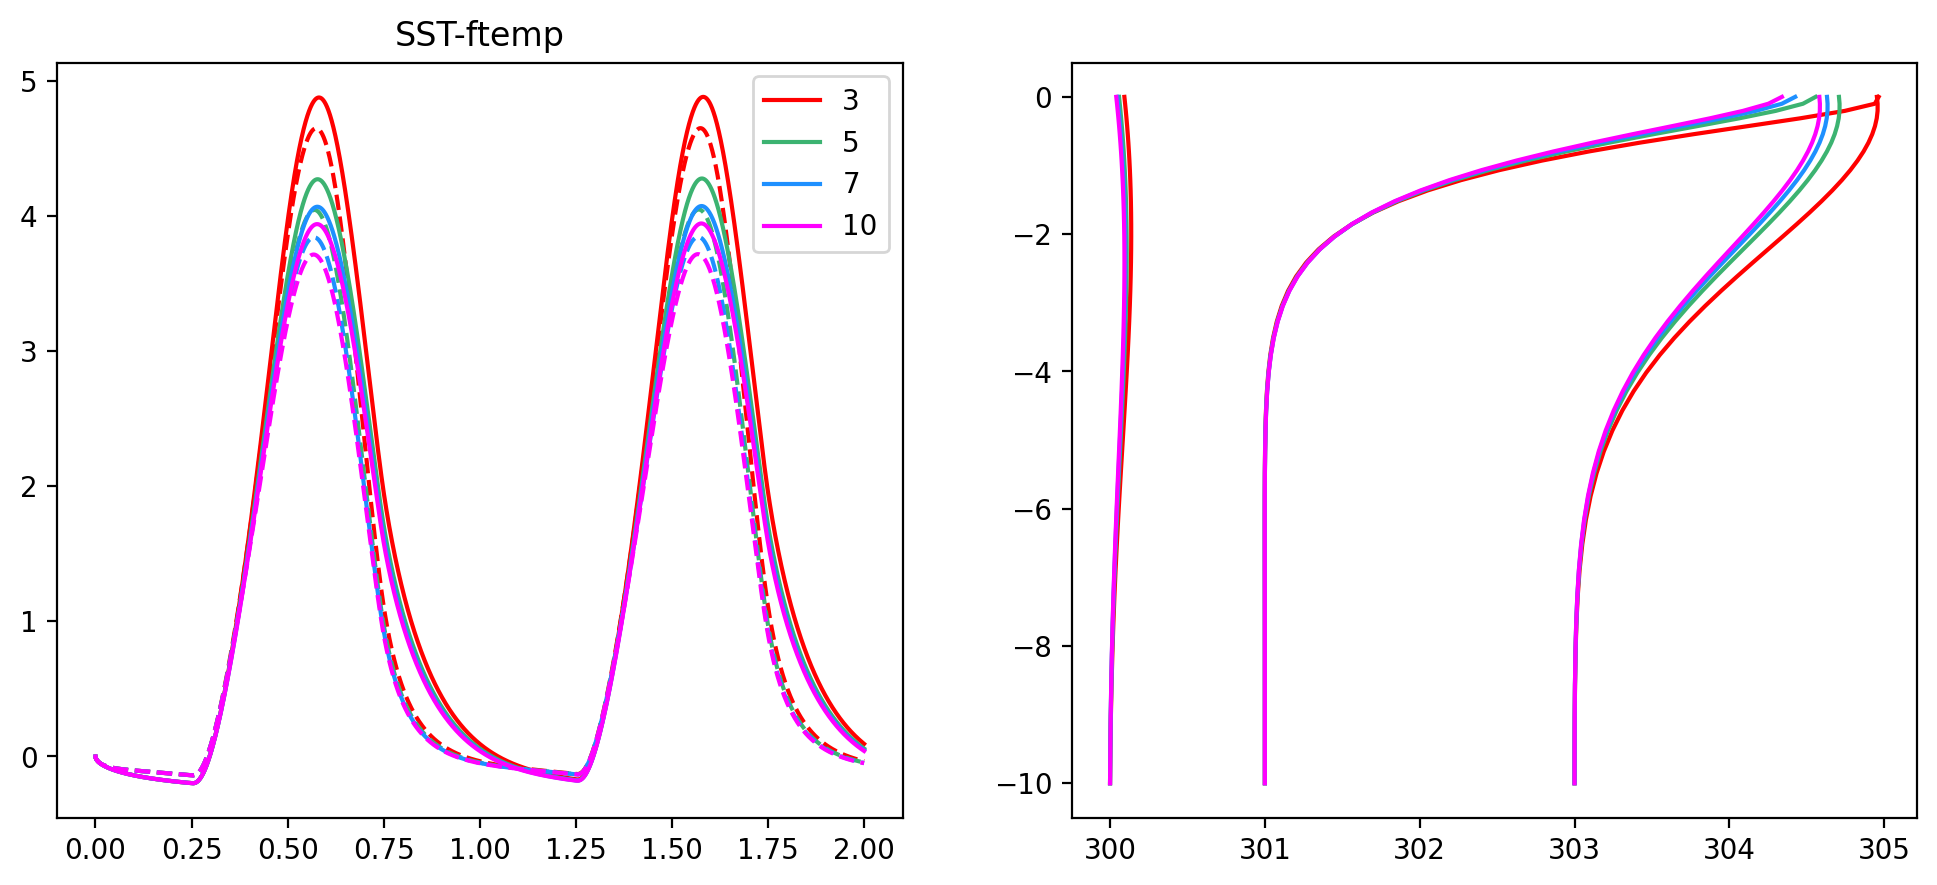

In [18]:
simstrat = []
parstrat = [3,5,7,10]

for i in range(len(parstrat)):
    simstrat.append(simulate_eulerd(params,strat=parstrat[i]))

cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(parstrat)):
    ax[0].plot(simstrat[i][2]/86400,simstrat[i][0][:,0]-simstrat[i][0][:,-1],label=parstrat[i],c=cols[i])
    ax[0].plot(simstrat[i][2]/86400,simstrat[i][0][:,0]-simstrat[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(parstrat)):
    noon = np.where(simstrat[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simstrat[i][2]/86400 > 0.75)[0][0]
    night = np.where(simstrat[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simstrat[i][0][noon,:]+1,simstrat[i][1],c=cols[i])
    ax[1].plot(simstrat[i][0][pm6,:]+3,simstrat[i][1],c=cols[i])
    ax[1].plot(simstrat[i][0][night,:],simstrat[i][1],c=cols[i])

plt.show()

+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.1392931938171387
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0677032470703125
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.0136582851409912
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 

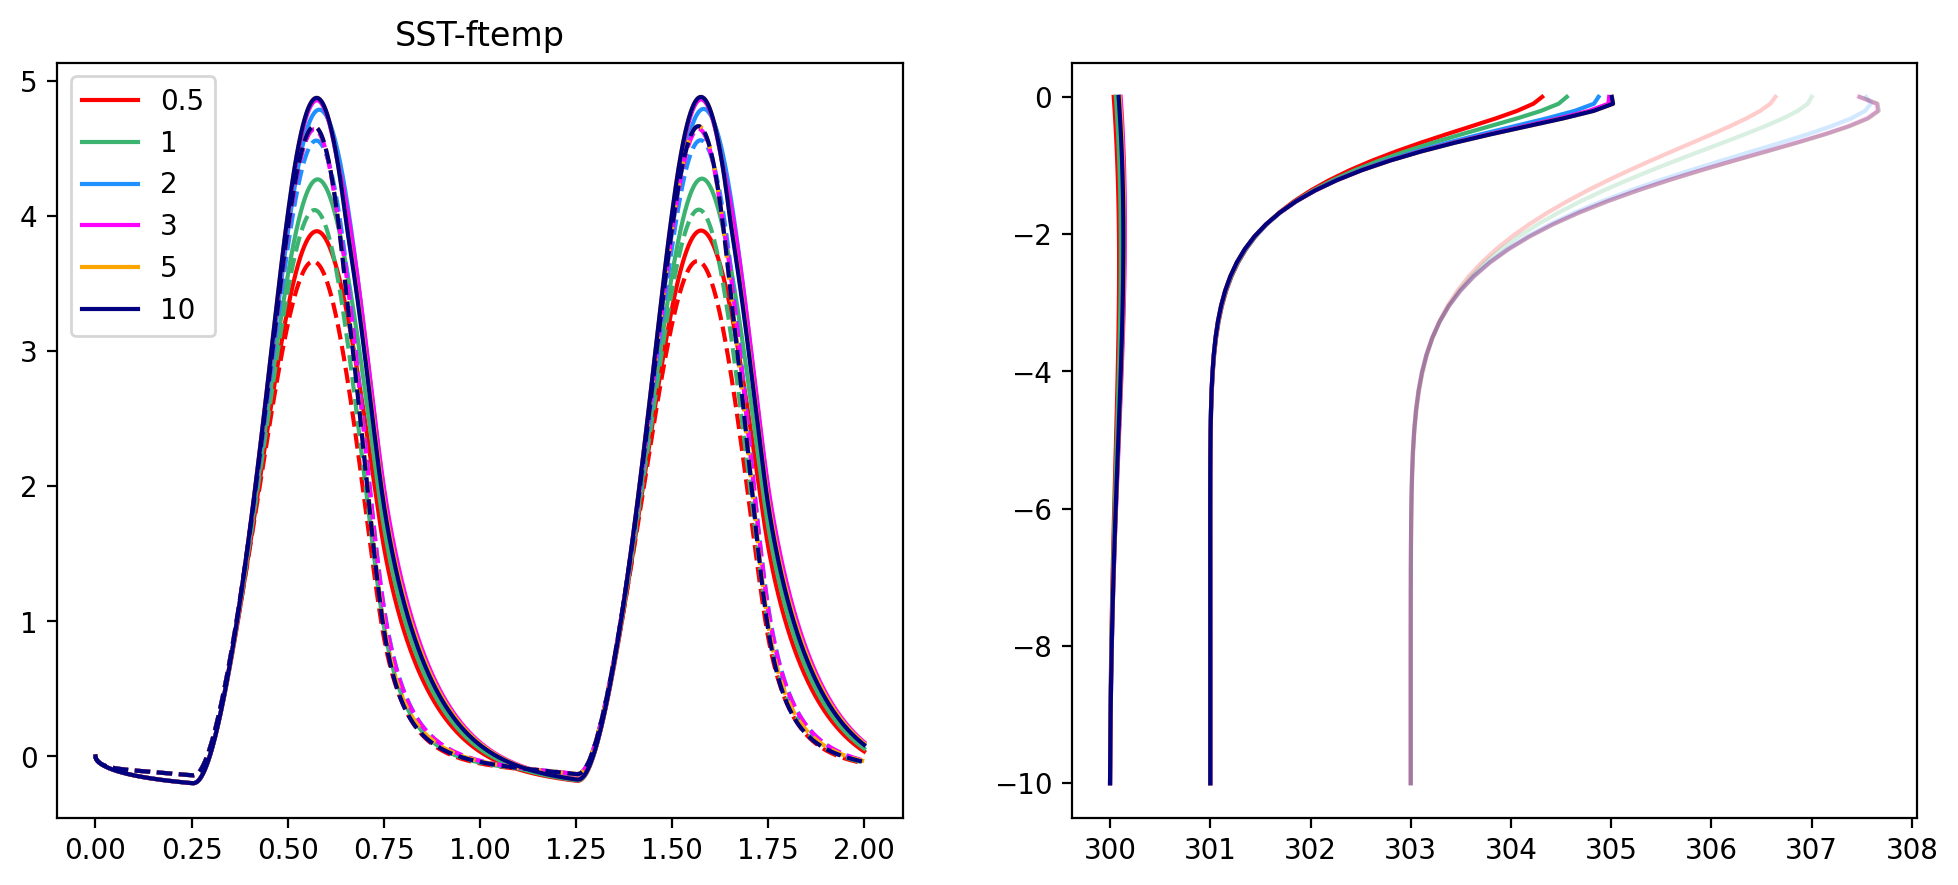

In [21]:
simstratdepth = []
parstratdepth = [0.5,1,2,3,5,10]

for i in range(len(parstratdepth)):
    simstratdepth.append(simulate_eulerd(params,stratdepth=parstratdepth[i]))

cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(parstratdepth)):
    ax[0].plot(simstratdepth[i][2]/86400,simstratdepth[i][0][:,0]-simstratdepth[i][0][:,-1],label=parstratdepth[i],c=cols[i])
    ax[0].plot(simstratdepth[i][2]/86400,simstratdepth[i][0][:,0]-simstratdepth[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].set(title='SST-ftemp')


for i in range(len(parstratdepth)):
    noon = np.where(simstratdepth[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simstratdepth[i][2]/86400 > 0.625)[0][0]
    night = np.where(simstratdepth[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simstratdepth[i][0][noon,:]+1,simstratdepth[i][1],c=cols[i])
    ax[1].plot(simstratdepth[i][0][pm6,:]+3,simstratdepth[i][1],c=cols[i],alpha=0.2)
    ax[1].plot(simstratdepth[i][0][night,:],simstratdepth[i][1],c=cols[i])

plt.show()

In [8]:
simwind = []
parwind = [0.,1,2,3,5]

for i in range(len(parwind)):
    simwind.append(simulate_eulerd(params,windstrength=parwind[i]))

+++ Variable time-step interpolation +++
Interpolated dataset has 20153 time steps with average length 10.0 s.
Constant dt interpolation would require dt = 10.526 s --> 18189 steps.
Computation time will be reduced by -10.798 %
++++++++++++++++++++++++++++++++++++++++
Done, took  0.8978257179260254
+++ Variable time-step interpolation +++
Interpolated dataset has 23844 time steps with average length 8.519 s.
Constant dt interpolation would require dt = 5.555 s --> 34468 steps.
Computation time will be reduced by 30.823 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.032956838607788
+++ Variable time-step interpolation +++
Interpolated dataset has 36721 time steps with average length 6.058 s.
Constant dt interpolation would require dt = 3.125 s --> 61273 steps.
Computation time will be reduced by 40.07 %
++++++++++++++++++++++++++++++++++++++++
Done, took  1.5611732006072998
+++ Variable time-step interpolation +++
Interpolated dataset has 61512 time steps with average length 3

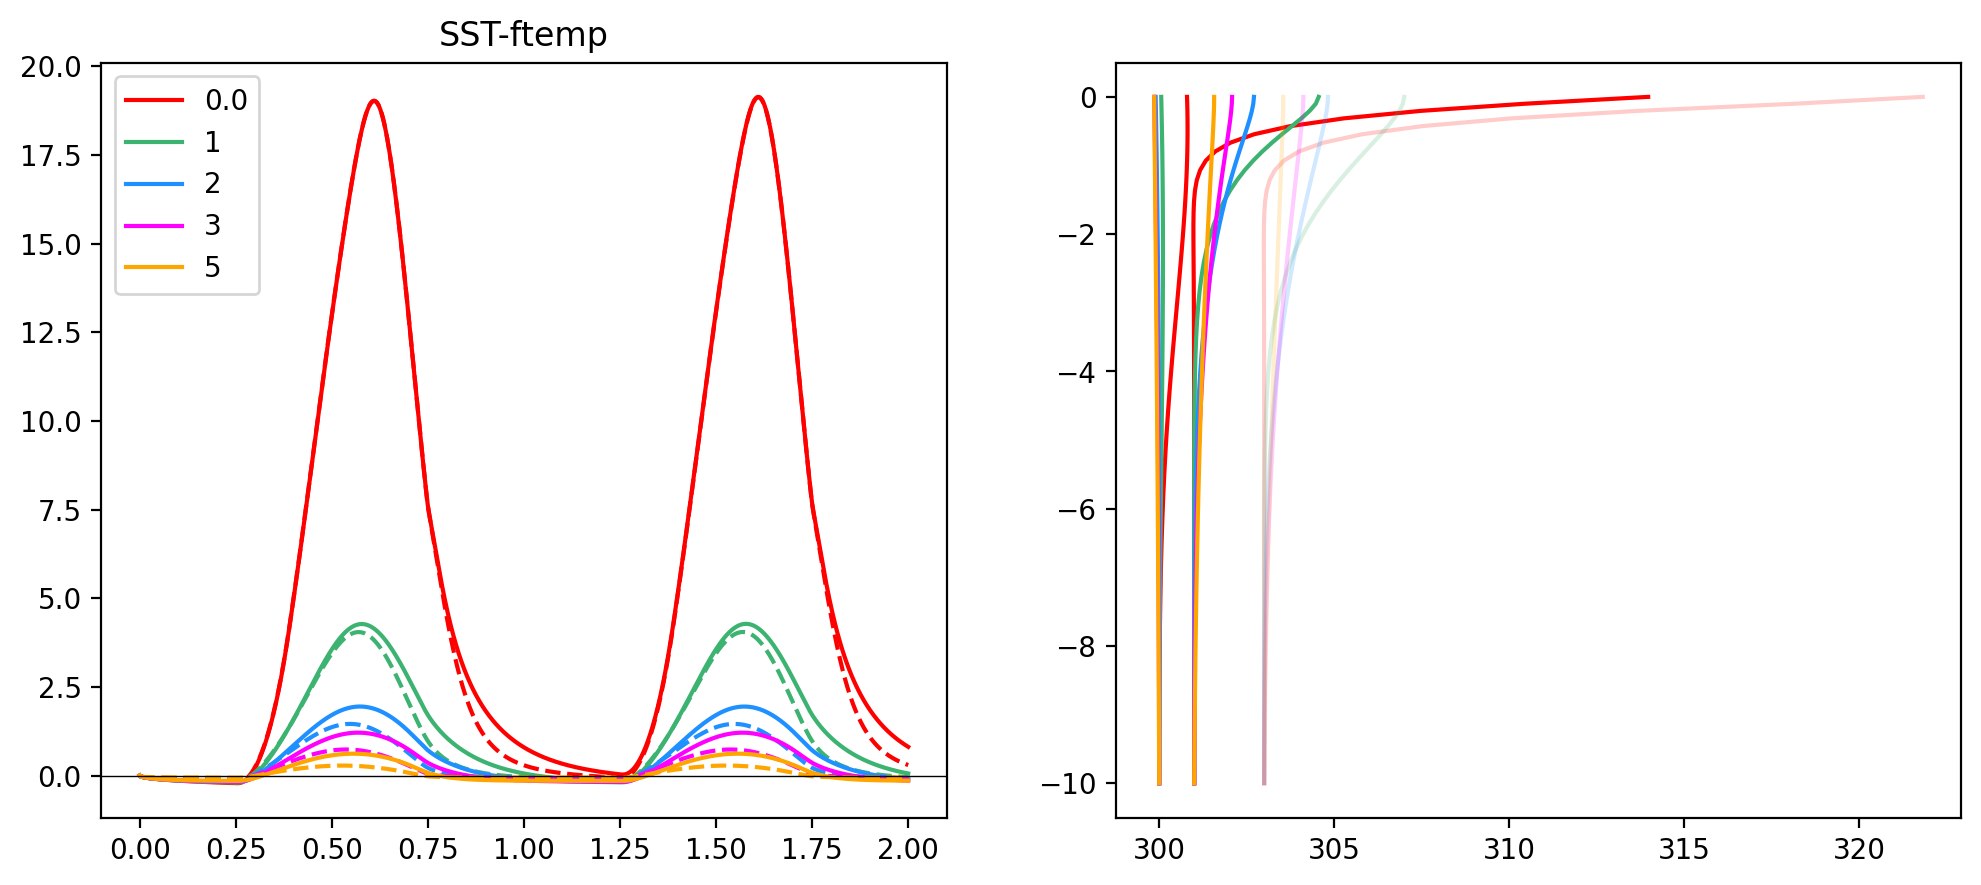

In [9]:
cols = ['red','mediumseagreen','dodgerblue','magenta','orange','navy']
fig, ax = plt.subplots(1,2,dpi=200,figsize=(12,5))
for i in range(len(parwind)):
    ax[0].plot(simwind[i][2]/86400,simwind[i][0][:,0]-simwind[i][0][:,-1],label=parwind[i],c=cols[i])
    ax[0].plot(simwind[i][2]/86400,simwind[i][0][:,0]-simwind[i][0][:,20],'--',c=cols[i])
ax[0].legend()
ax[0].axhline(y=0,lw=.5,c='k')
ax[0].set(title='SST-ftemp')


for i in range(len(parwind)):
    noon = np.where(simwind[i][2]/86400 > 0.5)[0][0]
    pm6 = np.where(simwind[i][2]/86400 > 0.625)[0][0]
    night = np.where(simwind[i][2]/86400 > 1.)[0][0]
    ax[1].plot(simwind[i][0][noon,:]+1,simwind[i][1],c=cols[i])
    ax[1].plot(simwind[i][0][pm6,:]+3,simwind[i][1],c=cols[i],alpha=0.2)
    ax[1].plot(simwind[i][0][night,:],simwind[i][1],c=cols[i])

plt.show()

In [10]:
ampmax = []
for i in range(len(parwind)):
    ampmax.append(np.amax(simwind[i][0][:,0])-simwind[i][0][0,0])

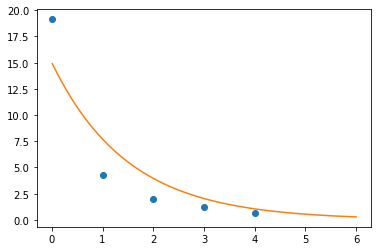

In [15]:
amps = np.array(ampmax)

xxx = np.linspace(0.01,6,200)
plt.plot(amps,'o')
plt.plot(xxx,15*np.exp(-xxx/1.5))